$$ \LaTeX \text{ command declarations here.}
\newcommand{\N}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\norm}[1]{\|#1\|_2}
\newcommand{\d}{\mathop{}\!\mathrm{d}}
\newcommand{\qed}{\qquad \mathbf{Q.E.D.}}
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vy}{\mathbf{y}}
\newcommand{\vt}{\mathbf{t}}
\newcommand{\vb}{\mathbf{b}}
\newcommand{\vw}{\mathbf{w}}
\newcommand{\vm}{\mathbf{m}}
\newcommand{\I}{\mathbb{I}}
\newcommand{\th}{\text{th}}
$$

# EECS 445:  Machine Learning
## Hands On 06:  Linear Regression II
* Instructor:  **Ben Bray, Chansoo Lee, Jia Deng, Jake Abernethy**
* Date:  October 5, 2016

## Estimating the probability of a lead pipes Flint

Officials are investing \$27Million to dig up lead pipes in Flint MI. Before they spend \$5k on digging up the pipes for a home, they want a better estimate whether the pipe is lead. We have two observable variables, whether the home is *Old* (i.e. built before 1950) or not (built after 1950), and what the messy city records suggest. Keep in mind the city records are often wrong.

We make the "naive bayes" assumption that, given the target HasLead(X), the events IsOld(X) and RecordsSayLead(X) are independent of each other. Initially, the city believes the following parameters are roughly true:

\begin{align}
P(HasLead(X)) &= 0.4\\
P(IsOld(X) \mid HasLead(X)) &= 0.7\\
P(IsOld(X) \mid Not HasLead(X)) &= 0.3\\
P(RecordsSayLead(X) \mid HasLead(X)) &= 0.8\\
P(RecordsSayLead(X) \mid Not HasLead(X)) &= 0.5
\end{align}

Compute the probabilty of Lead for all four categories: $\{ IsOld(X) \& RecordsSayLead(X), Not IsOld(X) \& RecordsSayLead(X), IsOld(X) \& Not RecordsSayLead(X), Not IsOld(X) \& Not RecordsSayLead(X) \}$


## Flint Starts Gathering Data, wants to update parameters

Over the past month, Flint has dug up about 200 service lines, and they've observed the pipe materials for several of these. They are starting to believe their initial estimates are incorrect.

They want to update these values, still assuming the Naive Bayes model. Here are the necessary parameters of this model:
\begin{align}
P(HasLead(X)) &= \pi_{\text{HasLead}} =  ?\\
P(IsOld(X) \mid HasLead(X)) & = \theta_{\text{HasLead}, \text{IsOld}} = ?\\
P(IsOld(X) \mid Not HasLead(X)) &= \theta_{\text{NotHasLead}, \text{IsOld}} = ?\\
P(RecordsSayLead(X) \mid HasLead(X)) &= \theta_{\text{HasLead}, \text{RecordsSayLead}} = ?\\
P(RecordsSayLead(X) \mid Not HasLead(X)) &= \theta_{\text{NotHasLead}, \text{RecordsSayLead}} = ?
\end{align}

Load the dataset and compute the **maximum likelihood** estimate for the above parameters.


In [2]:
%pylab inline
import numpy as np
import pandas as pd
data = pd.read_csv('estimating_lead.csv')

# Run this to see a printout of the data
data

Populating the interactive namespace from numpy and matplotlib


,Lead,IsOld,RecordSaysLead
0,Lead,True,True
1,Lead,True,True
2,Lead,True,True
3,Lead,True,True
4,Lead,True,True
5,NotLead,True,True
6,Lead,True,True
7,NotLead,False,False
8,Lead,True,True
9,Lead,True,True


In [3]:
# The object 'data' is a pandas DataFrame
# Don't worry if you don't know what that is, we can turn it into a numpy array
datamatrix = data.as_matrix()

## Putting a Prior on $\pi_{\text{HasLead}}$

For the case of the discreet event, such as material=Lead or =NoLead, we are working with a categorical distribution, i.e. a distrbution on one of $C$ things occuring. The parameters of this distribution are a probability vector $\pi \in \Delta_C$. (That is, $\pi_c \geq 0$ for all $c$, and $\sum_c \pi_c = 1$.)

Often when we have limited data, we want to add a prior distribution on our parameters. The standard prior to use is a *Dirichlet* with parameters $\alpha_1, \ldots, \alpha_C$. That is, we assume that $\pi \sim \mathrm{Dirichlet}(\alpha_1, \dots, \alpha_C)$. Recall that the Dirichlet has PDF $f(\pi_1, \dots, \pi_C) = \frac{1}{B(\alpha)} \prod_{c=1}^C \pi_c^{\alpha_c-1}$, where $B(\cdot)$ is just the normalizing term.

For our Flint problem, assume that the parameters $(\pi_{\text{HasLead}}, 1-\pi_{\text{HasLead}}) \sim \mathrm{Dirichlet}(3,3)$. Compute the MAP estimate of $\pi_{\text{HasLead}}$ for this distribution using the above dataset.

## Brute Force Search for Max-Margin SVM Solution

In the hard-margin support vector machine formulation, we want to try to find the hyperplane the maximizes the margin and correctly classifies the data.

Let's generate some data!

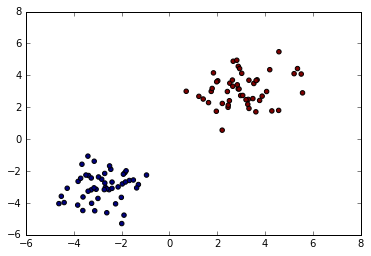

In [4]:
center1 = np.array([3.0,3.0])
center2 = np.array([-3.0,-3.0])
X = np.zeros((100,2)); Y = np.zeros((100,))
X[:50,:] = np.random.multivariate_normal(center1, np.eye(2),(50,))
Y[:50] = +1
X[50:,:] = np.random.multivariate_normal(center2, np.eye(2),(50,))
Y[50:] = -1

plt.scatter(X[:,0], X[:,1], c = Y)

# Problem:

1. First pick one vector and offset term $(\vec{w}, b)$ that correctly classifies the data
1. Determine the size of the margin for this $\vec{w}$
1. **Challenging**: Do a brute force search (over a grid) to find the max-margin $\vec{w}$! Note, this is not a good idea in general, since this algorithm has time complexity exponential in the dimension, but it's not so bad in 2d!

In [15]:
wvec = np.array([-4.0,7.0])
bval = -2.4
# Does this wvec and b correctly classify data within margin?

In [21]:
scores = X.dot(wvec.reshape((2,1))) + bval
predicted_labels = np.sign(scores)
np.sum(predicted_labels.reshape((100,))==Y)

89